In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [2]:
# ✅ Clone the official Ultralytics YOLOv8 repo
!git clone https://github.com/ultralytics/ultralytics.git

# ✅ Change directory into the repo folder
%cd ultralytics

# ✅ Install YOLOv8 in editable mode (needed to run directly from repo)
!pip install -e .


Cloning into 'ultralytics'...
remote: Enumerating objects: 55837, done.
remote: Counting objects: 100% (342/342), done.
remote: Compressing objects: 100% (189/189), done.
remote: Total 55837 (delta 248), reused 172 (delta 153), pack-reused 55495 (from 3)
Receiving objects: 100% (55837/55837), 31.15 MiB | 13.62 MiB/s, done.
Resolving deltas: 100% (41369/41369), done.
/content/ultralytics
Obtaining file:///content/ultralytics
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [3]:
# ✅ Import YOLO interface and system utilities
from ultralytics import YOLO
import os


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
!ls /content


sample_data  ultralytics


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
# List all folders in your Google Drive root
!ls "/content/drive/MyDrive/ACV_Assignment_3"

ACV_Assignment3_RCNN.ipynb    fasterrcnn_epoch_2.pth
ACV_Assignment3_YoloV8.ipynb  Model.ipynb
fasterrcnn_epoch_1.pth	      VOCtrainval_06-Nov-2007.tar


In [7]:
# Step 1: Create a local folder to extract Pascal VOC
!mkdir -p /content/VOCdevkit

# Step 2: Extract the .tar file from Google Drive into /content
!tar -xvf "/content/drive/MyDrive/ACV_Assignment_3/VOCtrainval_06-Nov-2007.tar" -C /content/VOCdevkit/


Streaming output truncated to the last 5000 lines.
VOCdevkit/VOC2007/JPEGImages/001732.jpg
VOCdevkit/VOC2007/JPEGImages/001733.jpg
VOCdevkit/VOC2007/JPEGImages/001734.jpg
VOCdevkit/VOC2007/JPEGImages/001738.jpg
VOCdevkit/VOC2007/JPEGImages/001739.jpg
VOCdevkit/VOC2007/JPEGImages/001741.jpg
VOCdevkit/VOC2007/JPEGImages/001746.jpg
VOCdevkit/VOC2007/JPEGImages/001747.jpg
VOCdevkit/VOC2007/JPEGImages/001749.jpg
VOCdevkit/VOC2007/JPEGImages/001750.jpg
VOCdevkit/VOC2007/JPEGImages/001752.jpg
VOCdevkit/VOC2007/JPEGImages/001754.jpg
VOCdevkit/VOC2007/JPEGImages/001755.jpg
VOCdevkit/VOC2007/JPEGImages/001756.jpg
VOCdevkit/VOC2007/JPEGImages/001758.jpg
VOCdevkit/VOC2007/JPEGImages/001759.jpg
VOCdevkit/VOC2007/JPEGImages/001761.jpg
VOCdevkit/VOC2007/JPEGImages/001765.jpg
VOCdevkit/VOC2007/JPEGImages/001766.jpg
VOCdevkit/VOC2007/JPEGImages/001768.jpg
VOCdevkit/VOC2007/JPEGImages/001771.jpg
VOCdevkit/VOC2007/JPEGImages/001772.jpg
VOCdevkit/VOC2007/JPEGImages/001775.jpg
VOCdevkit/VOC2007/JPEGImages/

In [8]:
!tar -xf "/content/drive/MyDrive/ACV_Assignment_3/VOCtrainval_06-Nov-2007.tar"

In [9]:
!ls VOCdevkit/VOC2007

Annotations  ImageSets	JPEGImages  SegmentationClass  SegmentationObject


In [10]:
!ls /content/VOCdevkit


VOCdevkit


In [11]:
# Move inner VOCdevkit out to /content
!mv /content/VOCdevkit/VOCdevkit/VOC2007 /content/VOCdevkit/

# Remove the extra empty VOCdevkit
!rm -r /content/VOCdevkit/VOCdevkit


In [12]:
VOC_PATH = "/content/VOCdevkit/VOC2007"
assert os.path.exists(VOC_PATH), "❌ Pascal VOC dataset not found!"
print("✅ Pascal VOC 2007 dataset found.")


✅ Pascal VOC 2007 dataset found.


In [13]:
yaml_content = '''\
path: /content/VOCdevkit/VOC2007
train: images/train
val: images/val
nc: 20
names: ["aeroplane", "bicycle", "bird", "boat", "bottle",
        "bus", "car", "cat", "chair", "cow", "diningtable", "dog", "horse",
        "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"]
'''

with open("/content/voc.yaml", "w") as f:
    f.write(yaml_content)

print("✅ YOLOv8 voc.yaml created successfully.")


✅ YOLOv8 voc.yaml created successfully.


In [14]:
import os
import xml.etree.ElementTree as ET
from sklearn.model_selection import train_test_split

# Define VOC paths
img_dir = "/content/VOCdevkit/VOC2007/JPEGImages"
ann_dir = "/content/VOCdevkit/VOC2007/Annotations"
output_img_dir = "/content/VOCdevkit/VOC2007/images"
output_lbl_dir = "/content/VOCdevkit/VOC2007/labels"

# Create output folders
os.makedirs(f"{output_img_dir}/train", exist_ok=True)
os.makedirs(f"{output_img_dir}/val", exist_ok=True)
os.makedirs(f"{output_lbl_dir}/train", exist_ok=True)
os.makedirs(f"{output_lbl_dir}/val", exist_ok=True)

# VOC class list
voc_classes = ["aeroplane", "bicycle", "bird", "boat", "bottle",
               "bus", "car", "cat", "chair", "cow", "diningtable",
               "dog", "horse", "motorbike", "person", "pottedplant",
               "sheep", "sofa", "train", "tvmonitor"]

def convert_box(size, box):
    # Convert VOC box to YOLO format: x_center, y_center, width, height (normalized)
    dw = 1. / size[0]
    dh = 1. / size[1]
    x_center = (box[0] + box[2]) / 2.0
    y_center = (box[1] + box[3]) / 2.0
    w = box[2] - box[0]
    h = box[3] - box[1]
    return [x_center * dw, y_center * dh, w * dw, h * dh]

# List all XML annotation files
xml_files = [f for f in os.listdir(ann_dir) if f.endswith('.xml')]
train_files, val_files = train_test_split(xml_files, test_size=0.2, random_state=42)

def process_files(file_list, subset):
    for xml_file in file_list:
        tree = ET.parse(os.path.join(ann_dir, xml_file))
        root = tree.getroot()

        filename = root.find('filename').text
        img_path = os.path.join(img_dir, filename)
        output_img_path = os.path.join(output_img_dir, subset, filename)
        output_lbl_path = os.path.join(output_lbl_dir, subset, filename.replace(".jpg", ".txt"))

        # Copy image to destination
        if os.path.exists(img_path):
            os.system(f"cp {img_path} {output_img_path}")

        size = root.find('size')
        width = int(size.find('width').text)
        height = int(size.find('height').text)

        with open(output_lbl_path, "w") as out_file:
            for obj in root.findall('object'):
                cls_name = obj.find('name').text
                if cls_name not in voc_classes:
                    continue
                cls_id = voc_classes.index(cls_name)
                bndbox = obj.find('bndbox')
                box = [float(bndbox.find('xmin').text), float(bndbox.find('ymin').text),
                       float(bndbox.find('xmax').text), float(bndbox.find('ymax').text)]
                bb = convert_box((width, height), box)
                out_file.write(f"{cls_id} {' '.join([str(round(a, 6)) for a in bb])}\n")

# Process train and val sets
process_files(train_files, 'train')
process_files(val_files, 'val')

print("✅ Conversion complete! Annotations saved in YOLO format.")


✅ Conversion complete! Annotations saved in YOLO format.


In [15]:
!ls /content/VOCdevkit/VOC2007/labels/train | head -5
!ls /content/VOCdevkit/VOC2007/labels/val | head -5


000005.txt
000009.txt
000012.txt
000016.txt
000017.txt
000007.txt
000032.txt
000033.txt
000042.txt
000048.txt


In [16]:
from ultralytics import YOLO

# Load pretrained YOLOv8 nano model
model = YOLO("yolov8n.pt")

# Train for 50 epochs on Pascal VOC 2007
model.train(
    data="/content/voc.yaml",   # path to voc.yaml
    epochs=50,                  # ✅ ideal number of epochs
    imgsz=640,                  # input image size
    batch=16,                   # batch size
    name="yolov8_voc2007",      # experiment name
    device=0                    # use GPU if available
)


100%|██████████| 6.25M/6.25M [00:00<00:00, 402MB/s]


Ultralytics 8.3.109 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/voc.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_voc2007, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

100%|██████████| 755k/755k [00:00<00:00, 138MB/s]


Overriding model.yaml nc=80 with nc=20

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 420MB/s]


AMP: checks passed ✅


train: Scanning /content/VOCdevkit/VOC2007/labels/train... 4008 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4008/4008 [00:02<00:00, 1522.10it/s]


train: New cache created: /content/VOCdevkit/VOC2007/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/VOCdevkit/VOC2007/labels/val... 1003 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1003/1003 [00:00<00:00, 1243.46it/s]


val: New cache created: /content/VOCdevkit/VOC2007/labels/val.cache
Plotting labels to /content/ultralytics/runs/detect/yolov8_voc2007/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000417, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/ultralytics/runs/detect/yolov8_voc2007
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.14G      1.086      2.901      1.287         53        640: 100%|██████████| 251/251 [00:25<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.71it/s]


                   all       1003       3136      0.644      0.589      0.634      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.77G      1.147      1.894      1.325         36        640: 100%|██████████| 251/251 [00:22<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.06it/s]


                   all       1003       3136       0.65      0.578      0.629       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.78G       1.16      1.834       1.34         43        640: 100%|██████████| 251/251 [00:21<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.95it/s]


                   all       1003       3136      0.627      0.532      0.594       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.8G      1.161       1.78      1.342         53        640: 100%|██████████| 251/251 [00:21<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.83it/s]


                   all       1003       3136      0.628      0.561      0.605      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.82G      1.153      1.711      1.337         49        640: 100%|██████████| 251/251 [00:21<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.94it/s]


                   all       1003       3136      0.639      0.553      0.597      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.83G      1.149       1.66      1.337         32        640: 100%|██████████| 251/251 [00:21<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.47it/s]


                   all       1003       3136       0.65      0.557      0.604      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.85G      1.129      1.586      1.326         49        640: 100%|██████████| 251/251 [00:22<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.89it/s]


                   all       1003       3136      0.653      0.572       0.62      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.87G      1.128      1.525      1.315         50        640: 100%|██████████| 251/251 [00:21<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.97it/s]


                   all       1003       3136      0.676      0.583      0.647      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.88G      1.103      1.476      1.303         50        640: 100%|██████████| 251/251 [00:21<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.08it/s]


                   all       1003       3136      0.676      0.583      0.647      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.9G      1.099      1.451      1.292         59        640: 100%|██████████| 251/251 [00:21<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  8.00it/s]


                   all       1003       3136      0.651      0.575       0.62      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.91G      1.082      1.406      1.282         40        640: 100%|██████████| 251/251 [00:22<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.07it/s]

                   all       1003       3136      0.718      0.597       0.67      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.93G      1.084      1.375      1.279         42        640: 100%|██████████| 251/251 [00:22<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.01it/s]


                   all       1003       3136      0.681      0.611      0.641      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.95G       1.08      1.343      1.279         48        640: 100%|██████████| 251/251 [00:21<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.96it/s]


                   all       1003       3136      0.698       0.59      0.647      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.97G      1.057      1.302      1.266         38        640: 100%|██████████| 251/251 [00:21<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.12it/s]


                   all       1003       3136      0.739      0.591      0.674      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.98G      1.046      1.282      1.267         44        640: 100%|██████████| 251/251 [00:21<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.05it/s]


                   all       1003       3136      0.661      0.623      0.656       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         3G      1.043       1.25      1.254         79        640: 100%|██████████| 251/251 [00:22<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.15it/s]


                   all       1003       3136      0.714      0.607      0.682      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.02G      1.028      1.243      1.247         46        640: 100%|██████████| 251/251 [00:22<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.99it/s]


                   all       1003       3136       0.75      0.599      0.678      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.04G      1.031      1.225      1.246         56        640: 100%|██████████| 251/251 [00:21<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.05it/s]


                   all       1003       3136      0.748      0.603      0.684       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.05G      1.037      1.197      1.248         56        640: 100%|██████████| 251/251 [00:22<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.96it/s]


                   all       1003       3136      0.704      0.654      0.692      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.07G      1.024      1.177      1.236         51        640: 100%|██████████| 251/251 [00:21<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.05it/s]


                   all       1003       3136      0.711      0.621      0.687      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.09G       1.01      1.143       1.23         40        640: 100%|██████████| 251/251 [00:21<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.03it/s]


                   all       1003       3136      0.712      0.628       0.69      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       3.1G     0.9963      1.119      1.221         30        640: 100%|██████████| 251/251 [00:21<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.07it/s]


                   all       1003       3136       0.71       0.64      0.686      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.12G     0.9965      1.118      1.219         62        640: 100%|██████████| 251/251 [00:21<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.99it/s]


                   all       1003       3136      0.744      0.637      0.705      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.14G      0.998      1.105      1.221         58        640: 100%|██████████| 251/251 [00:22<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.12it/s]


                   all       1003       3136      0.742      0.652      0.717      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.15G     0.9842      1.083      1.213         52        640: 100%|██████████| 251/251 [00:21<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.23it/s]


                   all       1003       3136      0.747      0.628      0.707      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.17G     0.9731      1.058      1.202         48        640: 100%|██████████| 251/251 [00:21<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.97it/s]


                   all       1003       3136       0.74      0.635      0.703      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.18G     0.9808      1.058      1.203         49        640: 100%|██████████| 251/251 [00:22<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.14it/s]


                   all       1003       3136      0.734      0.629      0.698      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.21G     0.9686       1.04      1.196         44        640: 100%|██████████| 251/251 [00:22<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.23it/s]


                   all       1003       3136      0.742      0.651      0.716      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.22G      0.955      1.023      1.193         57        640: 100%|██████████| 251/251 [00:21<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.16it/s]


                   all       1003       3136      0.754      0.635      0.705      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.24G     0.9551      1.012      1.195         69        640: 100%|██████████| 251/251 [00:22<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.93it/s]


                   all       1003       3136      0.721      0.641      0.702      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.25G     0.9536      1.006      1.189         54        640: 100%|██████████| 251/251 [00:22<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.96it/s]


                   all       1003       3136      0.705      0.657      0.699      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.27G     0.9415     0.9864      1.176         49        640: 100%|██████████| 251/251 [00:21<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.12it/s]

                   all       1003       3136       0.74      0.629      0.707      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.29G     0.9431     0.9729      1.182         53        640: 100%|██████████| 251/251 [00:22<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.09it/s]


                   all       1003       3136      0.753      0.656      0.719      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.31G     0.9281     0.9518      1.174         94        640: 100%|██████████| 251/251 [00:22<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.22it/s]


                   all       1003       3136      0.749      0.655      0.717      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.32G     0.9267     0.9532       1.17         41        640: 100%|██████████| 251/251 [00:22<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.19it/s]


                   all       1003       3136      0.753      0.637      0.724      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.34G     0.9188     0.9448      1.169         39        640: 100%|██████████| 251/251 [00:22<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  8.00it/s]


                   all       1003       3136      0.778      0.642      0.718      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.36G      0.913     0.9222      1.161         59        640: 100%|██████████| 251/251 [00:22<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.09it/s]


                   all       1003       3136       0.77       0.64      0.724      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.38G     0.9096     0.9224      1.161         38        640: 100%|██████████| 251/251 [00:22<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.12it/s]


                   all       1003       3136       0.74      0.669      0.731      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.39G        0.9     0.9033      1.155         31        640: 100%|██████████| 251/251 [00:22<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.98it/s]


                   all       1003       3136       0.78      0.649       0.73      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.41G     0.8963     0.8945      1.153         33        640: 100%|██████████| 251/251 [00:22<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.22it/s]


                   all       1003       3136       0.78      0.639      0.726      0.504
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.43G     0.8741     0.8055      1.128         15        640: 100%|██████████| 251/251 [00:22<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.01it/s]


                   all       1003       3136       0.78      0.621      0.714      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.45G     0.8607     0.7596      1.119         28        640: 100%|██████████| 251/251 [00:21<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.04it/s]


                   all       1003       3136      0.756      0.654      0.717      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.46G      0.839     0.7184      1.109         17        640: 100%|██████████| 251/251 [00:21<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.19it/s]


                   all       1003       3136      0.798      0.634      0.723      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.48G     0.8303     0.7063      1.097         29        640: 100%|██████████| 251/251 [00:21<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.15it/s]


                   all       1003       3136      0.776      0.635      0.723      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       3.5G     0.8236     0.7001      1.091         29        640: 100%|██████████| 251/251 [00:21<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.22it/s]


                   all       1003       3136      0.758      0.652      0.723      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.51G     0.8124      0.675      1.083         18        640: 100%|██████████| 251/251 [00:21<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.05it/s]


                   all       1003       3136      0.777      0.646      0.725      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.53G     0.8166     0.6794      1.087         28        640: 100%|██████████| 251/251 [00:21<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.16it/s]


                   all       1003       3136      0.792      0.643      0.728      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.55G     0.8064     0.6643      1.082         29        640: 100%|██████████| 251/251 [00:21<00:00, 11.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.99it/s]


                   all       1003       3136      0.781      0.651      0.726      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.56G     0.7953     0.6483      1.071         17        640: 100%|██████████| 251/251 [00:21<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.03it/s]


                   all       1003       3136      0.797      0.647      0.729      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.58G     0.7912     0.6507       1.07         30        640: 100%|██████████| 251/251 [00:21<00:00, 11.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.25it/s]


                   all       1003       3136      0.787      0.653      0.726      0.509

50 epochs completed in 0.367 hours.
Optimizer stripped from /content/ultralytics/runs/detect/yolov8_voc2007/weights/last.pt, 6.2MB
Optimizer stripped from /content/ultralytics/runs/detect/yolov8_voc2007/weights/best.pt, 6.2MB

Validating /content/ultralytics/runs/detect/yolov8_voc2007/weights/best.pt...
Ultralytics 8.3.109 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.34it/s]


                   all       1003       3136      0.777       0.65       0.73      0.511
             aeroplane         54         69      0.803      0.769      0.817      0.603
               bicycle         35         56      0.905      0.839      0.898      0.685
                  bird         69        132      0.763      0.614      0.648       0.42
                  boat         26         70      0.675      0.415      0.482      0.241
                bottle         56        100        0.7       0.51      0.577      0.354
                   bus         38         51      0.837      0.627      0.719      0.623
                   car        158        333      0.881      0.737      0.873       0.66
                   cat         78         87      0.817      0.678      0.771      0.587
                 chair        117        247      0.718      0.441      0.568      0.375
                   cow         31         86      0.704      0.674      0.703      0.467
           diningtabl

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7daa942d16d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043

In [29]:
!find /content -name "best.pt"


/content/ultralytics/runs/detect/yolov8_voc2007/weights/best.pt


In [31]:
!ls "/content/drive/MyDrive/ACV_Assignment_3"


ACV_Assignment3_RCNN.ipynb    fasterrcnn_epoch_2.pth	   yolov8_best.pt
ACV_Assignment3_YoloV8.ipynb  Model.ipynb
fasterrcnn_epoch_1.pth	      VOCtrainval_06-Nov-2007.tar


In [30]:
!cp /content/ultralytics/runs/detect/yolov8_voc2007/weights/best.pt "/content/drive/MyDrive/ACV_Assignment_3/yolov8_best.pt"
print("✅ YOLOv8 best.pt saved to Google Drive!")


✅ YOLOv8 best.pt saved to Google Drive!


In [17]:
!cp /content/runs/detect/yolov8_voc2007/weights/best.pt "/content/drive/MyDrive/ACV_Assignment_3/yolov8_best.pt"
print("✅ YOLOv8 best.pt saved to Drive.")

cp: cannot stat '/content/runs/detect/yolov8_voc2007/weights/best.pt': No such file or directory
✅ YOLOv8 best.pt saved to Drive.


In [18]:
# Evaluate best trained model on validation set
metrics = model.val()
print("📊 Evaluation complete. Metrics:")
print(metrics)


Ultralytics 8.3.109 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/VOCdevkit/VOC2007/labels/val.cache... 1003 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1003/1003 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 10.59it/s]


                   all       1003       3136      0.779      0.649      0.732      0.512
             aeroplane         54         69      0.802      0.768      0.819      0.603
               bicycle         35         56      0.907      0.839        0.9      0.688
                  bird         69        132      0.759      0.614      0.652       0.42
                  boat         26         70      0.692      0.414      0.487      0.241
                bottle         56        100      0.695       0.51      0.585      0.362
                   bus         38         51      0.842      0.627      0.719      0.624
                   car        158        333      0.881      0.731      0.872      0.658
                   cat         78         87       0.82      0.678      0.775      0.583
                 chair        117        247      0.721      0.441      0.567      0.375
                   cow         31         86      0.709      0.674      0.713      0.475
           diningtabl

In [19]:
# Run inference on validation set and save visual predictions
model.predict(
    source="/content/VOCdevkit/VOC2007/images/val",  # path to val images
    save=True,                                        # save predictions as images
    conf=0.25,                                        # confidence threshold
    project="runs/predict",                           # output folder
    name="yolov8_val_preds",                          # subfolder
    device=0                                          # GPU
)




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1003 /content/VOCdevkit/VOC2007/images/val/000007.jpg: 448x640 1 car, 47.2ms
image 2/1003 /content/VOCdevkit/VOC2007/images/val/000032.jpg: 384x640 1 aeroplane, 3 boats, 2 persons, 46.5ms
image 3/1003 /content/VOCdevkit/VOC2007/images/val/000033.jpg: 480x640 1 aeroplane, 1 car, 45.8ms
image 4/1003 /content/VOCdevkit/VOC2007/images/val/000042.jpg: 448x640 2 trains, 8.0ms
image 5/1003 /content/VOCdevkit/VOC2007/images/val/000048.jpg: 640x480 1 bi

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'aeroplane', 1: 'bicycle', 2: 'bird', 3: 'boat', 4: 'bottle', 5: 'bus', 6: 'car', 7: 'cat', 8: 'chair', 9: 'cow', 10: 'diningtable', 11: 'dog', 12: 'horse', 13: 'motorbike', 14: 'person', 15: 'pottedplant', 16: 'sheep', 17: 'sofa', 18: 'train', 19: 'tvmonitor'}
 obb: None
 orig_img: array([[[ 27,  35,  58],
         [ 11,  20,  34],
         [ 10,  21,  18],
         ...,
         [ 86, 114,  85],
         [ 46,  75,  49],
         [ 28,  58,  33]],
 
        [[177, 189, 195],
         [201, 213, 215],
         [  0,  12,   4],
         ...,
         [ 64,  93,  67],
         [ 94, 124,  99],
         [ 51,  83,  58]],
 
        [[ 30,  47,  20],
         [ 77,  95,  72],
         [ 33,  51,  34],
         ...,
         [ 22,  54,  35],
         [  0,  31,   5],
         [ 44,  84,  56]],
 
        ...,
 
        [[ 42, 101,  81],
     

In [20]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


In [21]:
def predict_and_plot(model, image_path, conf_thresh=0.25):
    """
    Uses YOLOv8 model to predict bounding boxes on a single image
    and displays the image with boxes, labels, and confidence.
    """
    # Run prediction
    results = model.predict(source=image_path, conf=conf_thresh, save=False, device=0)

    # Get results from first image (batch size = 1)
    result = results[0]
    img = Image.open(image_path).convert("RGB")
    img_np = np.array(img)

    # Draw bounding boxes
    for box, score, cls in zip(result.boxes.xyxy.cpu().numpy(),
                               result.boxes.conf.cpu().numpy(),
                               result.boxes.cls.cpu().numpy()):

        x1, y1, x2, y2 = map(int, box)
        label = model.names[int(cls)]
        conf = round(score, 2)

        # Draw rectangle and label
        cv2.rectangle(img_np, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img_np, f"{label} {conf}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2)

    # Show image with predictions
    plt.figure(figsize=(10, 8))
    plt.imshow(img_np)
    plt.axis("off")
    plt.title("YOLOv8 Prediction")
    plt.show()


In [22]:
!ls /content/VOCdevkit/VOC2007/images/val | head -100


000007.jpg
000032.jpg
000033.jpg
000042.jpg
000048.jpg
000065.jpg
000066.jpg
000083.jpg
000093.jpg
000104.jpg
000120.jpg
000122.jpg
000131.jpg
000133.jpg
000142.jpg
000147.jpg
000156.jpg
000165.jpg
000174.jpg
000193.jpg
000208.jpg
000228.jpg
000233.jpg
000244.jpg
000263.jpg
000270.jpg
000275.jpg
000278.jpg
000282.jpg
000306.jpg
000317.jpg
000321.jpg
000336.jpg
000338.jpg
000344.jpg
000355.jpg
000372.jpg
000396.jpg
000408.jpg
000416.jpg
000435.jpg
000443.jpg
000454.jpg
000464.jpg
000474.jpg
000496.jpg
000522.jpg
000535.jpg
000549.jpg
000577.jpg
000591.jpg
000592.jpg
000599.jpg
000619.jpg
000635.jpg
000661.jpg
000671.jpg
000672.jpg
000688.jpg
000694.jpg
000711.jpg
000712.jpg
000748.jpg
000753.jpg
000771.jpg
000772.jpg
000806.jpg
000808.jpg
000822.jpg
000827.jpg
000830.jpg
000834.jpg
000850.jpg
000854.jpg
000862.jpg
000867.jpg
000876.jpg
000878.jpg
000887.jpg
000896.jpg
000904.jpg
000921.jpg
000923.jpg
000948.jpg
000982.jpg
000991.jpg
000996.jpg
001001.jpg
001015.jpg
001041.jpg
001045.jpg


image 1/1 /content/VOCdevkit/VOC2007/images/val/000007.jpg: 448x640 1 car, 11.9ms
Speed: 3.5ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


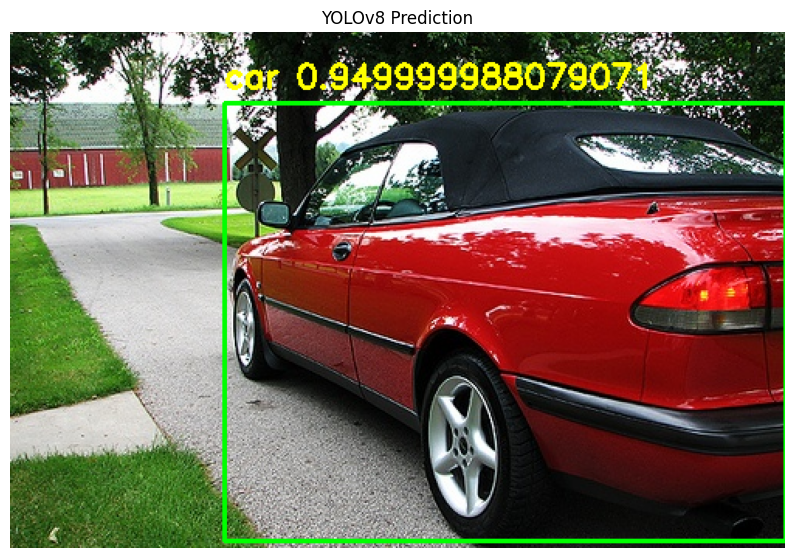

In [23]:
predict_and_plot(model, "/content/VOCdevkit/VOC2007/images/val/000007.jpg")


In [35]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches  # ✅ Needed for box drawing
from PIL import Image


In [36]:
from ultralytics import YOLO

# Load your YOLOv8 model (from Drive or local path)
yolo_model = YOLO("/content/drive/MyDrive/ACV_Assignment_3/yolov8_best.pt")


In [37]:
# Pick any test image ID from test.txt
test_img_id = "000065"  # You can change this to any image in the test set

# Build full image path
test_img_path = f"/content/VOCdevkit/VOC2007/JPEGImages/{test_img_id}.jpg"



image 1/1 /content/VOCdevkit/VOC2007/JPEGImages/000065.jpg: 448x640 1 dog, 9.1ms
Speed: 2.3ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


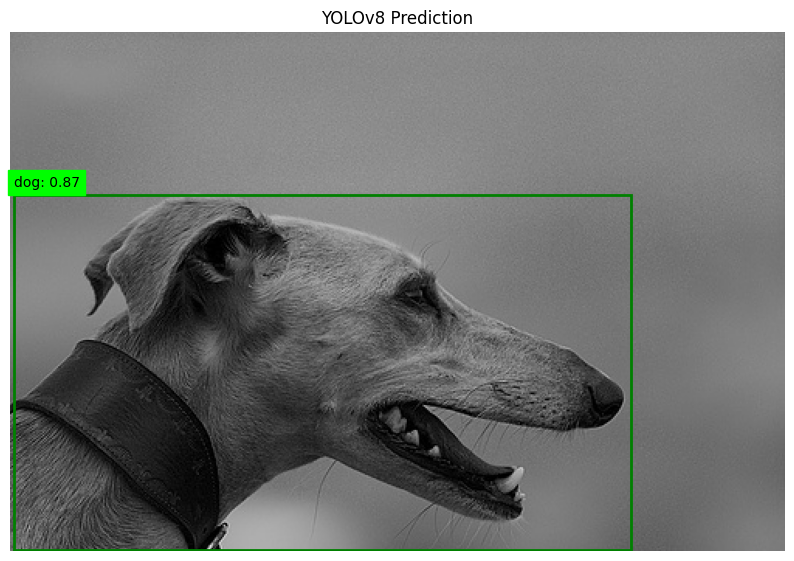

In [38]:
from ultralytics import YOLO

def show_yolo_prediction(yolo_model, img_path, threshold=0.5):
    result = yolo_model(img_path, conf=threshold)[0]

    img = Image.open(img_path).convert("RGB")
    fig, ax = plt.subplots(1, figsize=(10, 8))
    ax.imshow(img)

    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        score = float(box.conf[0])
        class_id = int(box.cls[0])
        label = yolo_model.names[class_id]

        if score >= threshold:
            rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='green', facecolor='none')
            ax.add_patch(rect)
            ax.text(x1, y1 - 5, f"{label}: {score:.2f}", color='black', fontsize=10, backgroundcolor='lime')

    plt.axis('off')
    plt.title("YOLOv8 Prediction")
    plt.show()

# Example usage:
show_yolo_prediction(yolo_model, test_img_path, threshold=0.5)


In [ ]:
import os

# Load all image IDs from Annotations folder
annotation_dir = "/content/VOCdevkit/VOC2007/Annotations"
all_ids = sorted([f.replace(".xml", "") for f in os.listdir(annotation_dir) if f.endswith(".xml")])

# Estimate ~20% for test (similar to val split)
num_test = int(len(all_ids) * 0.2)
test_ids = all_ids[-num_test:]  # use last 20%

# Write to test.txt
test_list_path = "/content/VOCdevkit/VOC2007/ImageSets/Main/test.txt"
os.makedirs(os.path.dirname(test_list_path), exist_ok=True)

with open(test_list_path, "w") as f:
    for id_ in test_ids:
        f.write(f"{id_}\n")

print(f"✅ Created test.txt with {len(test_ids)} image IDs.")


✅ Created test.txt with 1002 image IDs.


In [ ]:
import os
import xml.etree.ElementTree as ET

# Directories
img_dir = "/content/VOCdevkit/VOC2007/JPEGImages"
ann_dir = "/content/VOCdevkit/VOC2007/Annotations"
test_list = "/content/VOCdevkit/VOC2007/ImageSets/Main/test.txt"

output_img_dir = "/content/VOCdevkit/VOC2007/images/test"
output_lbl_dir = "/content/VOCdevkit/VOC2007/labels/test"
os.makedirs(output_img_dir, exist_ok=True)
os.makedirs(output_lbl_dir, exist_ok=True)

voc_classes = ["aeroplane", "bicycle", "bird", "boat", "bottle",
               "bus", "car", "cat", "chair", "cow", "diningtable",
               "dog", "horse", "motorbike", "person", "pottedplant",
               "sheep", "sofa", "train", "tvmonitor"]

def convert_box(size, box):
    dw = 1. / size[0]
    dh = 1. / size[1]
    x_center = (box[0] + box[2]) / 2.0
    y_center = (box[1] + box[3]) / 2.0
    w = box[2] - box[0]
    h = box[3] - box[1]
    return [x_center * dw, y_center * dh, w * dw, h * dh]

# Read test.txt file
with open(test_list) as f:
    test_ids = f.read().strip().split()

# Process each test image
for img_id in test_ids:
    xml_path = os.path.join(ann_dir, f"{img_id}.xml")
    img_path = os.path.join(img_dir, f"{img_id}.jpg")
    out_img_path = os.path.join(output_img_dir, f"{img_id}.jpg")
    out_lbl_path = os.path.join(output_lbl_dir, f"{img_id}.txt")

    # Copy image
    if os.path.exists(img_path):
        os.system(f"cp {img_path} {out_img_path}")

    # Parse annotation
    tree = ET.parse(xml_path)
    root = tree.getroot()
    size = root.find('size')
    width = int(size.find('width').text)
    height = int(size.find('height').text)

    with open(out_lbl_path, "w") as out_file:
        for obj in root.findall('object'):
            cls_name = obj.find('name').text
            if cls_name not in voc_classes:
                continue
            cls_id = voc_classes.index(cls_name)
            bndbox = obj.find('bndbox')
            box = [float(bndbox.find('xmin').text), float(bndbox.find('ymin').text),
                   float(bndbox.find('xmax').text), float(bndbox.find('ymax').text)]
            bb = convert_box((width, height), box)
            out_file.write(f"{cls_id} {' '.join([str(round(a, 6)) for a in bb])}\n")

print("✅ Test set images and labels prepared in YOLO format.")


✅ Test set images and labels prepared in YOLO format.


In [ ]:
voc_test_yaml = '''\
path: /content/VOCdevkit/VOC2007
train: images/train
val: images/val
test: images/test
nc: 20
names: ["aeroplane", "bicycle", "bird", "boat", "bottle",
        "bus", "car", "cat", "chair", "cow", "diningtable", "dog", "horse",
        "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"]
'''

with open("/content/voc_test.yaml", "w") as f:
    f.write(voc_test_yaml)

print("✅ voc_test.yaml updated with dummy train/val paths.")


✅ voc_test.yaml updated with dummy train/val paths.


In [ ]:
# Run YOLOv8 evaluation on test set using voc_test.yaml
metrics = model.val(data="/content/voc_test.yaml", split="test")

# Print mAP and other performance metrics
print("📊 Test Set Evaluation Results")
print(f"mAP@0.5     : {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.4f}")
print(f"Precision   : {metrics.box.mp:.4f}")
print(f"Recall      : {metrics.box.mr:.4f}")


Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)


val: Scanning /content/VOCdevkit/VOC2007/labels/test... 1002 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1002/1002 [00:00<00:00, 1544.07it/s]

val: New cache created: /content/VOCdevkit/VOC2007/labels/test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.46it/s]


                   all       1002       3276      0.896      0.817      0.896      0.696
             aeroplane         55         81      0.989      0.926      0.962       0.77
               bicycle         45         77      0.948      0.831      0.936      0.738
                  bird         64         98      0.898       0.81       0.88      0.653
                  boat         32         75      0.893      0.787       0.83      0.619
                bottle         47        149      0.794      0.718      0.815      0.571
                   bus         53         73      0.928      0.886      0.935      0.805
                   car        177        387      0.921      0.814      0.927      0.709
                   cat         66         72      0.955      0.877      0.975      0.832
                 chair        108        280      0.882      0.666      0.802      0.579
                   cow         33         93      0.819      0.882      0.881      0.654
           diningtabl

In [ ]:
import os

test_txt = "/content/VOCdevkit/VOC2007/ImageSets/Main/test.txt"
jpeg_dir = "/content/VOCdevkit/VOC2007/JPEGImages"

with open(test_txt) as f:
    test_ids = [line.strip() for line in f.readlines()[:100]]

test_image_paths = [os.path.join(jpeg_dir, f"{img_id}.jpg") for img_id in test_ids]
print(f"✅ Loaded {len(test_image_paths)} test images for comparison.")


✅ Loaded 100 test images for comparison.


In [ ]:
!ls /content/ultralytics/runs/detect/


yolov8_voc2007	yolov8_voc20072  yolov8_voc20073


In [ ]:
from ultralytics import YOLO
import time

# ✅ Load the correct YOLOv8 trained model checkpoint
yolo_model = YOLO("/content/ultralytics/runs/detect/yolov8_voc2007/weights/best.pt")

start = time.time()
yolo_results = yolo_model(test_image_paths, stream=False, conf=0.25)
yolo_time = time.time() - start

print(f"⚡ YOLOv8 inference time on 100 images: {yolo_time:.2f} seconds")



0: 640x640 10 bicycles, 1 dog, 21 persons, 0.6ms
1: 640x640 1 dog, 0.6ms
2: 640x640 2 diningtables, 2 pottedplants, 0.6ms
3: 640x640 1 cat, 1 person, 1 sofa, 0.6ms
4: 640x640 5 chairs, 1 sofa, 0.6ms
5: 640x640 3 cars, 3 persons, 1 train, 0.6ms
6: 640x640 1 car, 1 person, 0.6ms
7: 640x640 1 dog, 0.6ms
8: 640x640 4 cars, 1 person, 0.6ms
9: 640x640 4 cars, 1 person, 0.6ms
10: 640x640 1 cat, 0.6ms
11: 640x640 5 aeroplanes, 0.6ms
12: 640x640 1 cow, 2 horses, 2 persons, 0.6ms
13: 640x640 2 boats, 0.6ms
14: 640x640 4 motorbikes, 7 persons, 0.6ms
15: 640x640 2 bottles, 2 persons, 1 tvmonitor, 0.6ms
16: 640x640 (no detections), 0.6ms
17: 640x640 4 chairs, 1 diningtable, 6 persons, 1 sofa, 0.6ms
18: 640x640 2 persons, 0.6ms
19: 640x640 3 persons, 0.6ms
20: 640x640 2 chairs, 1 pottedplant, 1 sofa, 1 tvmonitor, 0.6ms
21: 640x640 4 cars, 1 person, 0.6ms
22: 640x640 5 persons, 0.6ms
23: 640x640 1 bus, 0.6ms
24: 640x640 7 cows, 0.6ms
25: 640x640 2 motorbikes, 1 person, 0.6ms
26: 640x640 1 dog, 1 per

In [32]:
# ✅ Function to load trained YOLOv8 model from Google Drive
from ultralytics import YOLO

def load_yolov8_model():
    # Load the YOLOv8 model from Google Drive
    return YOLO("/content/drive/MyDrive/ACV_Assignment_3/yolov8_best.pt")
